<a href="https://colab.research.google.com/github/Uzmamushtaque/Projects-in-Machine-Learning-and-AI/blob/main/AnomalyDetection_Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

In this project we perform anomaly detection in credit card fraud application.

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')
data = pd.read_csv('/content/gdrive/My Drive/final_cred_data.csv')

Mounted at /content/gdrive


In [3]:
data.head()

,Unnamed: 0,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class
0,0,152212.222222,1.816,13.245219,NaN,16.367516,0.029326,1.278423,2.748137,-1.331457,0.065879,-0.104518,-0.037517,-250.000000,-0.475633,0
1,1,159074.444444,163.568,4.401403,0.084682,-313.000000,0.001888,-0.103762,1.115678,NaN,0.062966,0.130546,-0.303582,NaN,NaN,0
2,2,43127.777778,24.000,-9.067399,0.762501,NaN,0.052481,-0.101681,-88.000000,0.117912,NaN,0.358812,-0.367016,NaN,361.000000,0
3,3,156042.222222,8.000,8.728304,-0.382673,NaN,-0.116056,-0.122346,-44.000000,-338.000000,0.042154,-0.261259,-0.103974,NaN,-1.654373,0
4,4,154720.000000,59.496,7.657141,0.150611,NaN,-0.034883,0.826100,0.357556,0.147640,NaN,0.080491,-0.693792,-0.308631,0.563570,0


<Axes: ylabel='Density'>

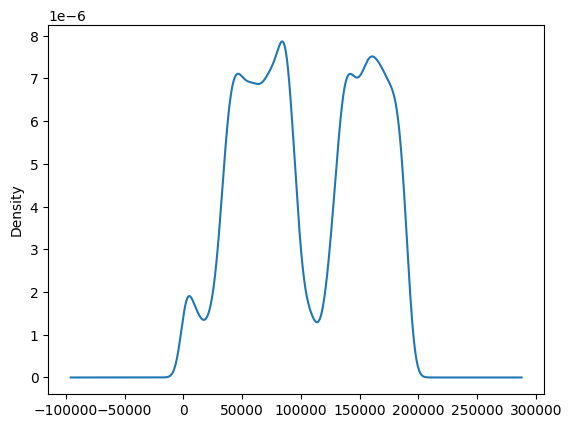

In [4]:
data['Timestamp'].plot.kde()

In [6]:
data.Class.value_counts()

0    139747
1       253
Name: Class, dtype: int64

Data is highly imbalanced, therefore its difficult to use any standard ML technique.

In [7]:
data.isna().sum()

Unnamed: 0        0
Timestamp         0
Value             0
C1            23768
C2            10269
C3            10307
C4                0
C5            10322
C6            23471
C7            14405
C8            10355
C9                0
C10           10109
C11           14305
C12           14167
Class             0
dtype: int64

In [14]:
data = data.drop(data.columns[[0]],axis = 1)

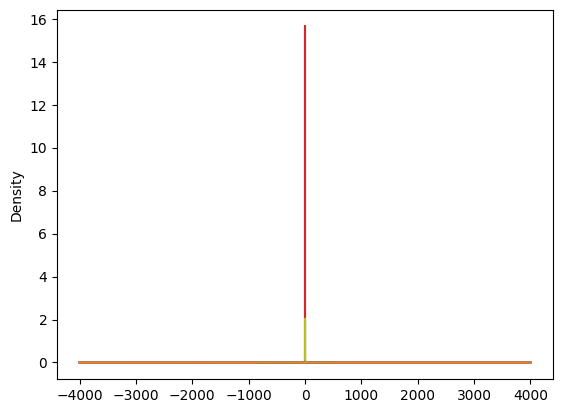

In [17]:
for var in data.columns[2:-1]:
  data[var].plot.kde()

In [18]:
data = data.fillna(data.mean()).drop("Timestamp",axis =1)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()
scaler = scaler.fit(data)
normalized_df = scaler.transform(data)
normalized_df

array([[8.83572404e-05, 5.03311305e-01, 8.07004843e-01, ...,
        4.37218609e-01, 5.00006093e-01, 0.00000000e+00],
       [7.95837946e-03, 5.01100351e-01, 8.33474471e-01, ...,
        4.95872916e-01, 4.96251145e-01, 0.00000000e+00],
       [1.16771683e-03, 4.97733150e-01, 8.34604169e-01, ...,
        4.95872916e-01, 5.90397599e-01, 0.00000000e+00],
       ...,
       [1.49467755e-04, 4.98993607e-01, 8.32551826e-01, ...,
        4.99743167e-01, 5.00098185e-01, 0.00000000e+00],
       [6.22782311e-04, 4.98160692e-01, 8.33866306e-01, ...,
        4.99743046e-01, 4.99786278e-01, 0.00000000e+00],
       [2.68574872e-03, 4.95979893e-01, 8.33460260e-01, ...,
        4.99805562e-01, 4.99674786e-01, 0.00000000e+00]])

In [37]:
df = pd.DataFrame(normalized_df,columns = data.columns)

In [38]:
df.head()

,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class
0,0.000088,0.503311,0.807005,0.741480,0.492391,0.835464,0.500812,0.499792,0.833443,0.599226,0.833271,0.437219,0.500006,0.0
1,0.007958,0.501100,0.833474,0.268523,0.436531,0.833160,0.500404,0.496432,0.833438,0.697043,0.832827,0.495873,0.496251,0.0
2,0.001168,0.497733,0.834604,0.694799,0.539528,0.833164,0.478120,0.500155,0.806555,0.792032,0.832722,0.495873,0.590398,0.0
3,0.000389,0.502182,0.832696,0.694799,0.196422,0.833129,0.489122,0.415562,0.833404,0.534002,0.833160,0.495873,0.499711,0.0
4,0.002895,0.501914,0.833584,0.694799,0.361673,0.834710,0.500214,0.500162,0.806555,0.676214,0.832177,0.499673,0.500266,0.0


In [32]:
from sklearn.model_selection import train_test_split

In [39]:
train_X = df.drop('Class', axis = 1)
train_y = df

In [40]:
train_X.shape,train_y.shape

((140000, 13), (140000, 14))

In [49]:
model = keras.Sequential([
    keras.Input(shape =(13,)),
    layers.Dense(13,activation = 'relu'),
    layers.Dense(10,activation = 'relu'),
    layers.Dense(6,activation = 'relu'),
    layers.Dense(10,activation = 'relu'),
    layers.Dense(13,activation = 'linear'),
    ])

optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss = 'mse', optimizer = optimizer)

In [50]:
model.fit(train_X,train_X,batch_size=128, epochs = 30)

Epoch 1/30
1094/1094 [==============================] - 3s 2ms/step - loss: 0.0068
Epoch 2/30
1094/1094 [==============================] - 3s 3ms/step - loss: 0.0030
Epoch 3/30
1094/1094 [==============================] - 3s 3ms/step - loss: 0.0025
Epoch 4/30
1094/1094 [==============================] - 2s 2ms/step - loss: 0.0021
Epoch 5/30
1094/1094 [==============================] - 3s 2ms/step - loss: 0.0019
Epoch 6/30
1094/1094 [==============================] - 3s 3ms/step - loss: 0.0018
Epoch 7/30
1094/1094 [==============================] - 2s 2ms/step - loss: 0.0017
Epoch 8/30
1094/1094 [==============================] - 3s 3ms/step - loss: 0.0017
Epoch 9/30
1094/1094 [==============================] - 2s 2ms/step - loss: 0.0016
Epoch 10/30
1094/1094 [==============================] - 2s 2ms/step - loss: 0.0016
Epoch 11/30
1094/1094 [==============================] - 2s 2ms/step - loss: 0.0016
Epoch 12/30
1094/1094 [==============================] - 2s 2ms/step - loss: 0.0016
E

Epoch 1/30
 195/1094 [====>.........................] - ETA: 1s - loss: 0.0014

In [53]:
predictions = model.predict(train_X)

4375/4375 [==============================] - 10s 2ms/step


In [55]:
error = np.square(predictions - train_X).mean(axis=1)
print(error.mean())

0.0012681067670446097


In [56]:
df_error = pd.DataFrame(error,columns =['error'])

In [57]:
df_error.shape

(140000, 1)

In [59]:
train_X.head()

,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12
0,0.000088,0.503311,0.807005,0.741480,0.492391,0.835464,0.500812,0.499792,0.833443,0.599226,0.833271,0.437219,0.500006
1,0.007958,0.501100,0.833474,0.268523,0.436531,0.833160,0.500404,0.496432,0.833438,0.697043,0.832827,0.495873,0.496251
2,0.001168,0.497733,0.834604,0.694799,0.539528,0.833164,0.478120,0.500155,0.806555,0.792032,0.832722,0.495873,0.590398
3,0.000389,0.502182,0.832696,0.694799,0.196422,0.833129,0.489122,0.415562,0.833404,0.534002,0.833160,0.495873,0.499711
4,0.002895,0.501914,0.833584,0.694799,0.361673,0.834710,0.500214,0.500162,0.806555,0.676214,0.832177,0.499673,0.500266


In [61]:
final_df = pd.concat([df.reset_index(drop = True),df_error.reset_index(drop=True)],axis = 1)

<Axes: ylabel='Density'>

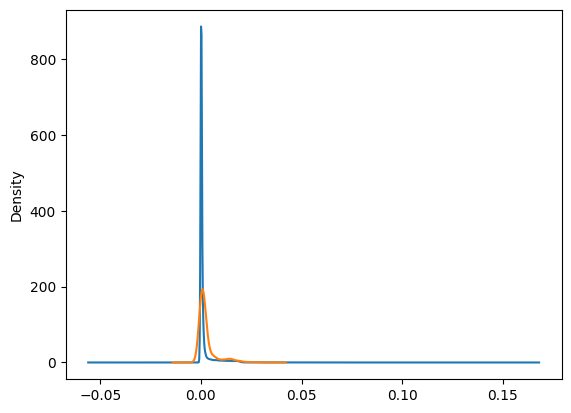

In [62]:
final_df[final_df['Class']==0].error.plot.kde()
final_df[final_df['Class']==1].error.plot.kde()